In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

# Carregar e visualizar os dados

In [2]:
# Carrear os dados - Regressão
df = pd.read_csv('datasets/dataset_colesterol.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# Ajustar o df
df.drop('Id', axis=1, inplace=True)

# Coletar medidas das variaveis categoricas
moda_grupo_sanguineo = df['Grupo Sanguíneo'].mode()
moda_fumante = df['Fumante'].mode()
moda_nivel_atividade_fisica = df['Nível de Atividade'].mode()

# Coletar medidas das variaveis numericas
media_idade = df['Idade'].mean()
media_peso = df['Peso'].mean()   
media_altura = df['Altura'].mean()

# Tratar valores ausentes
df.fillna(value={
    'Grupo Sanguíneo': moda_grupo_sanguineo[0],
    'Fumante': moda_fumante[0],
    'Nível de Atividade': moda_nivel_atividade_fisica[0],
    'Idade': media_idade,
    'Peso': media_peso,
    'Altura': media_altura    
}, inplace=True)

# Aplicar One Hot Encoding nas variáveis categóricas
df = pd.get_dummies(df, columns=["Grupo Sanguíneo", "Fumante", "Nível de Atividade"])

In [5]:
# DF atualizado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(4), uint

# Treinamento modelo de regressão linear multipla com RFE

In [6]:
# Separar X e Y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [7]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [8]:
# Treinar Modelo de Regressão Linear sem RFE
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

# Apresentar Plots Shapley Values - Regressão

In [9]:
# Rodar o explainer no conjunto de treinamento
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [10]:
# Calcular Shapley Values para o conjunto de testes
shap_values_reg = explainer_reg(X_test)

PermutationExplainer explainer: 301it [00:16,  6.31it/s]                         


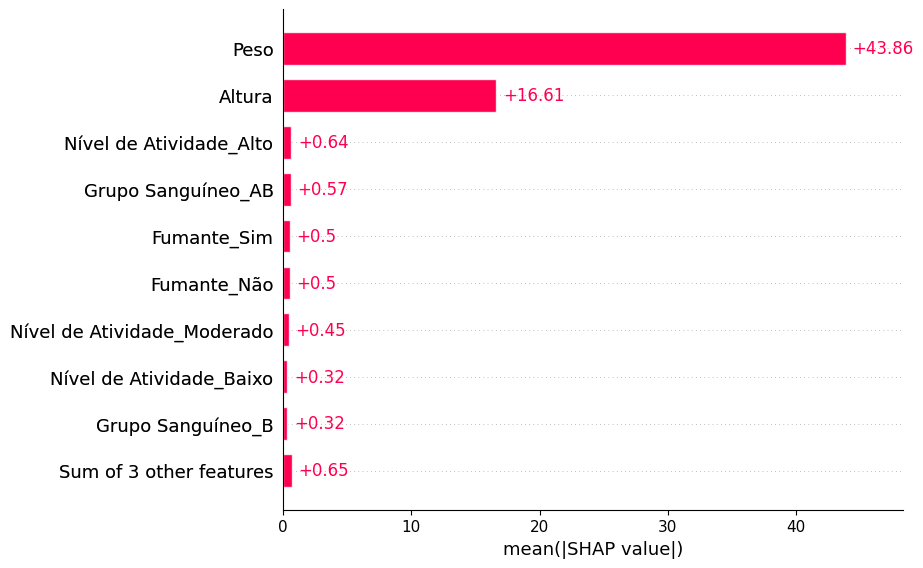

In [11]:
# Plotar a contribuição
shap.plots.bar(shap_values_reg)

In [16]:
# Mostrar primeira instância do conjunto de testes
paciente_1 = X_test.iloc[0, :]
paciente_1

Idade                           29.0
Peso                            87.8
Altura                         179.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 833, dtype: float64

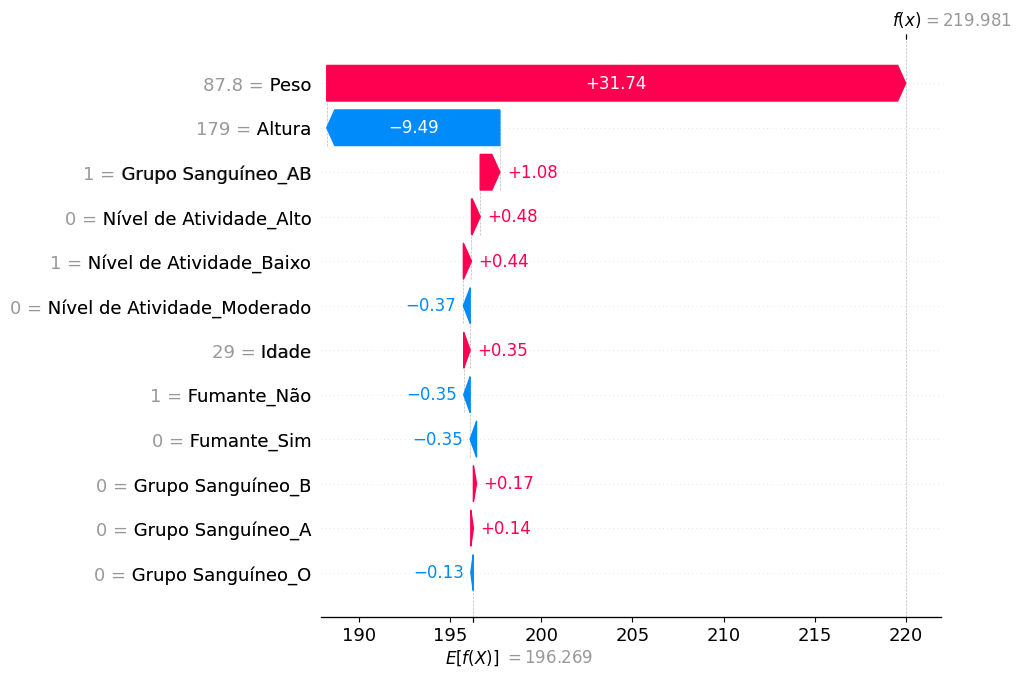

In [21]:
# Plotar os shapley values para o paciente 1
shap.plots.waterfall(shap_values_reg[0], max_display=13)

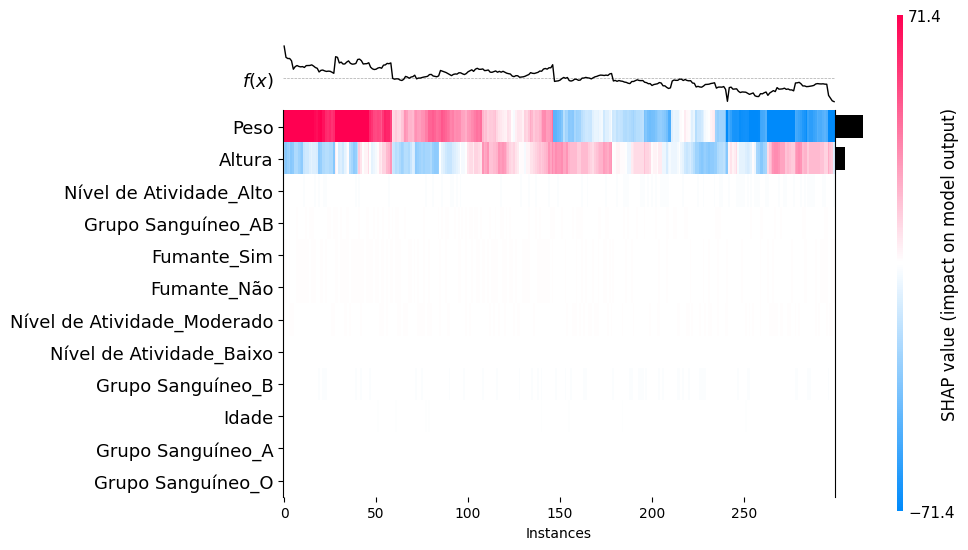

<Axes: xlabel='Instances'>

In [25]:
# Plotar Heatmap de contribuição
shap.plots.heatmap(shap_values_reg, max_display=13)

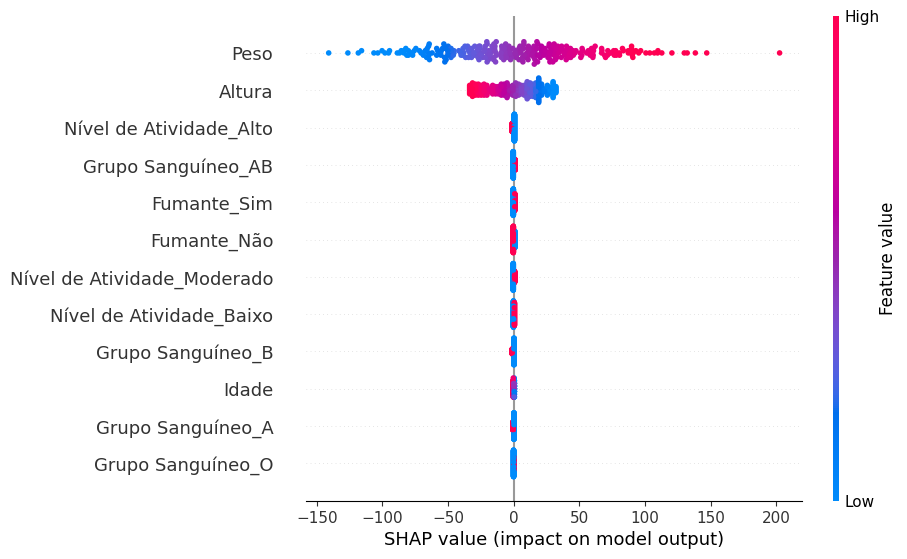

In [27]:
# Plot de beeswarm geral
shap.plots.beeswarm(shap_values_reg, max_display=13)